In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
boston = load_boston()

C:\Users\PaulRuddock\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
# Convert the dataset into a dataframe for our use case
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.drop("B",axis=1,inplace= True)

In [4]:
print('Data types of each column:')
print(bos.dtypes)

Data types of each column:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object


In [5]:
# Data Cleansing Steps
print('Number of missing values in each column:')
print(bos.isnull().sum())

Number of missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64


In [6]:
print('Number of duplicated rows:', bos.duplicated().sum())

Number of duplicated rows: 0


In [7]:
print('Summary statistics of the dataset:')
print(bos.describe())

Summary statistics of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.65

In [8]:
print('Shape of the cleaned dataset:', bos.shape)

Shape of the cleaned dataset: (506, 13)


In [9]:
print("The dataset appears to be clean")

The dataset appears to be clean


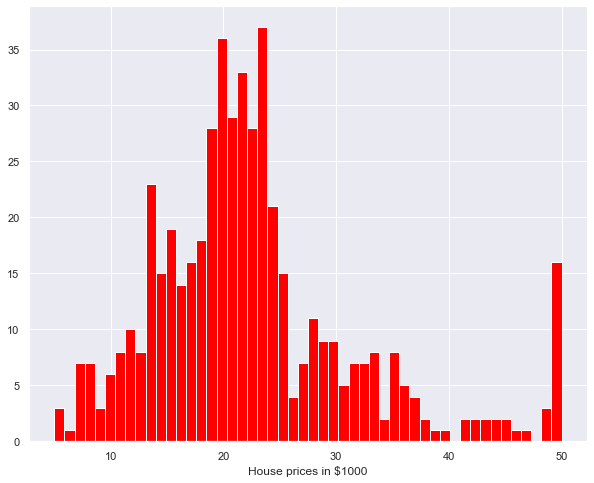

In [10]:
# Exploratory Data Analysis
sns.set(rc={'figure.figsize':(10,8)})
plt.hist(bos['PRICE'],color ="red", bins=50)
plt.xlabel("House prices in $1000")
plt.show()
# We can see from this that there is a slight negative skew and a bell shaped curve with some potential outliers at the top end

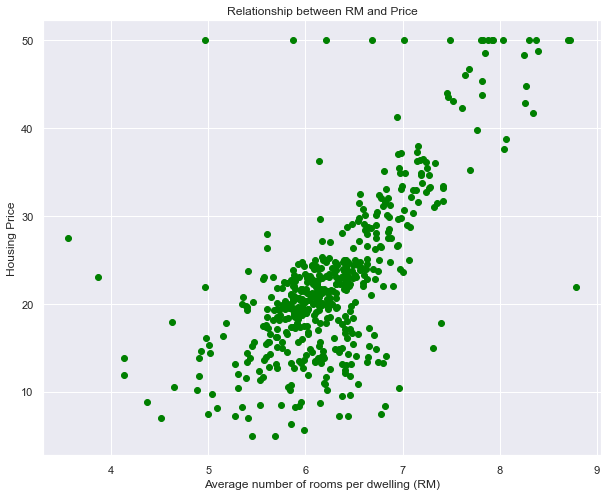

In [11]:
plt.scatter(bos['RM'], bos['PRICE'], color='green')
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()
# Here we can see that there is a positive trend, showing that a property with more rooms generally attracts a higher price

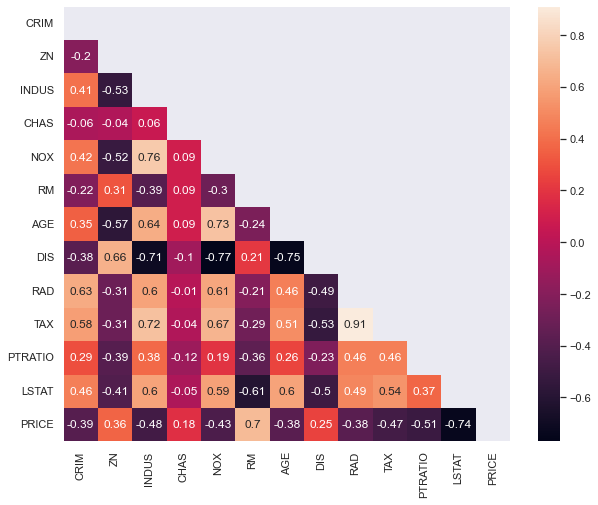

In [12]:
# The below shows us the correlation between the different fields. Some interesting correlations of note
# is the relationship between INDUS and NOX showing the damage that industry can cause to aur quality.
# Another relationship of note is PRICE and LSAT, showing that price is a good indicator of population status/class.
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, mask=np.triu(correlation_matrix))
plt.show()
# There are many other relationships of note, please see below for these:

In [13]:
# Create train and test sets of the data. I am trying to create a model that will accurately predict the price of a property
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=3)

In [14]:
# Create a Linear Regression model with my training data
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Test model performance
y_test_predict = lin_model.predict(X_test)
r2 = lin_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('R-squared: {}'.format(r2))
print('Mean Squared Error: {}'.format(mse))

The model performance for testing set
--------------------------------------
R-squared: 0.8303985169854374
Mean Squared Error: 12.19975744422592


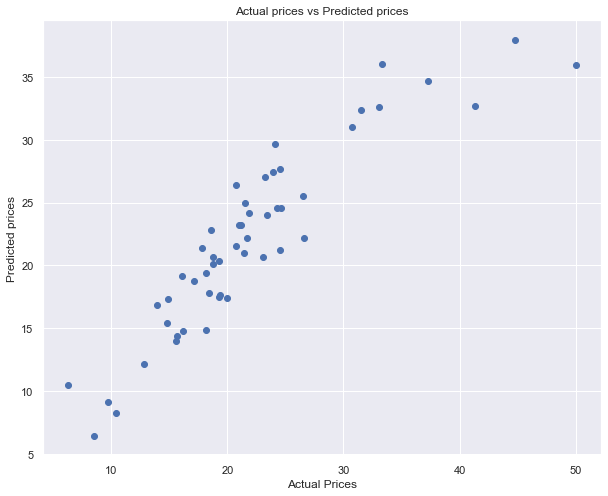

In [16]:
# Check predicted values against actual values
plt.scatter(y_test, y_test_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()
# I can see here that the model appears to be performing pretty well until around a price of 35 - this is likely due to a shortage of data at the top end

In [17]:
# Lets see this model predict the price of a new entry to the dataset
new_data = np.array([[5, 0, 17, 0, 0.5, 5, 53, 7, 3, 285, 18, 6]])
new_price = lin_model.predict(new_data)
print("The predicted price for the new house is: ${:.2f}".format(new_price[0]*1000))

The predicted price for the new house is: $16462.72


C:\Users\PaulRuddock\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.linear_model import Ridge, Lasso

# Create and fit a ridge regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [19]:
# Create and fit a lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [20]:
# Evaluate these models using this training data
models = [lin_model, ridge_model, lasso_model]
for model in models:
    y_test_predict = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_test_predict)
    print(model)
    print("R-squared: {}".format(r2))
    print("Mean Squared Error: {}".format(mse))
    print()

LinearRegression()
R-squared: 0.8303985169854374
Mean Squared Error: 12.19975744422592

Ridge(alpha=1)
R-squared: 0.8274960218148786
Mean Squared Error: 12.408539445623955

Lasso(alpha=0.01)
R-squared: 0.8304315780969043
Mean Squared Error: 12.197379295559044



In [21]:
# There does not appear to be much difference between these three models, however the Lasso model appears to be the best performing model